 < Press Enter to continue > 


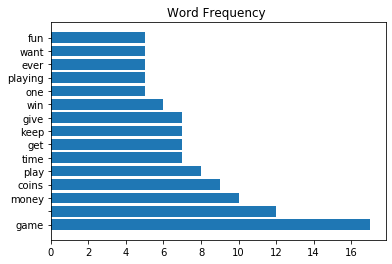

 < Press Enter to continue > 


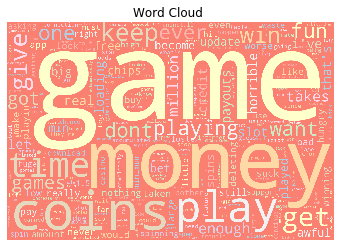

 < Press Enter to continue > 


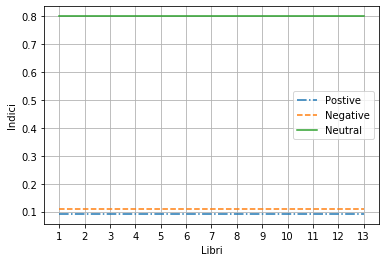

In [6]:
"""
Created on Thu Nov-17-2020 at 11:40:36
@author: Sarthak Jagdale (Author info at the bottom of the notebook)

Sciplay Feedback Review!
"""


import ipywidgets as ipw
from ipywidgets import *
import numpy as np
import time 
import sys

input(prompt=" < Press Enter to continue > ")

#import matplotlib
import matplotlib.pyplot as plt 

#import module
import numpy as np

#import operator to sort
import operator as op

# import wikipedia
import wikipedia as wiki

# import wordcloud module 
from wordcloud import WordCloud 



#create an empty dict  
text_dict = {}

#list of stop words 
from nltk.corpus import stopwords
stop_words=set(stopwords.words("english"))

#opening the file 
with open ('Online_review_sciplay.txt', 'r') as f:
    list1 = f.read().lower().split()

#Remove punctuation if any 
for i in range (0,len(list1)):
    list1[i] = list1[i].strip(' .,;?!\\😢 ')

#remove stop words
for word in list1:
    if word not in stop_words:
        if word in text_dict:
            text_dict[word] += 1
        else: 
            text_dict[word] = 1

        
#to get a list of tuples sorted by value descdant 
sort_list = sorted(text_dict.items(), 
                  key = op.itemgetter(1), reverse = True)       

#get first 10 words from the sort_list 
max_words = sort_list[0:15]

#to get list of words from list of tuples
words = list(zip(*max_words)) [0]

#to get list of frequencies from list of tuples
freq = list(zip(*max_words)) [1]


#to get the y of position
y_pos = np.arange(len(words))  

#create horizontal bar chart 
plt.barh(y_pos, freq, align = 'center')

#write words in y axis 
plt.yticks(y_pos, words)

#add a title
plt.title('Word Frequency ')

#show 
plt.show()


input(prompt=" < Press Enter to continue > ")


ds = WordCloud(background_color = 'salmon',
              width = 1500, height = 1000, colormap='Pastel1',random_state = 5, collocations = True, 
              max_words = 500).generate_from_frequencies(text_dict)  

plt.imshow(ds)

#add a title
plt.title('Word Cloud ')

# to remove axis 
plt.axis('off')

#show 
plt.show()
#____________________________________________________________________________

input(prompt=" < Press Enter to continue > ")
from afinn import Afinn
afinn = Afinn(language = 'en')

pos_index = []
neg_index = []
neutral_index = []

for word in range(1,14):
    file = text_dict#open('sources/' + str(book) + '.txt')
    lines = file#.readlines()
    pos = 0
    neg = 0
    neutral = 0
    
    for line in lines:
        score = int(afinn.score(line))
        
        if score > 0:
            pos += 1
        elif score < 0:
            neg += 1
        else:
            neutral += 1
        
    n = len(lines)
    pos_index.append(pos / n)
    neg_index.append(neg / n)
    neutral_index.append(neutral / n)
    
import matplotlib.pyplot as plt
import numpy as np
X = np.arange(1,14)
plt.plot(X,pos_index,'-.',label='Postive')
plt.plot(X,neg_index, '--',label='Negative')
plt.plot(X,neutral_index,'-',label='Neutral')
plt.legend()
plt.xticks(X)
plt.xlabel('Libri')
plt.ylabel('Indici')
plt.grid()
#plt.savefig('plots/afinn-bsi.png')
plt.show()
